# Simplest simulation of confidence reduction

- Two estimators
- Each one has a probability distribution
- They exchange their estimates
    - by the naive
    - by the conservative data exchange
- What if they repeated the exchange multiple times?
- What if the exchanged data gains some noises?



In [7]:
import random
import math
import matplotlib.pyplot as plt
import statistics

## make two distributions

N: 1000
sum1: 0.9999999999999997
sum2: 0.9999676541896152


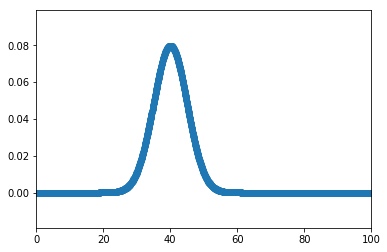

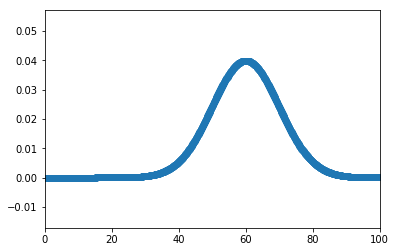

In [8]:
x_max = 100
x_min = 0
dlt = 0.1
N = int((x_max-x_min)/dlt)
print('N: ' + str(N))
x_axis = [x_min + i * dlt for i in range(N)]

def p(x, mean, sigma):
    return math.exp(-0.5*(x - mean)**2 / sigma / sigma) / math.sqrt(2*math.pi*sigma*sigma)


dist1 = [p(x, 40, 5) for x in x_axis]
print('sum1: ' + str(sum(dist1)*dlt))
dist2 = [p(x, 60, 10) for x in x_axis]
print('sum2: ' + str(sum(dist2)*dlt))

plt.scatter(x_axis, dist1)
plt.xlim(x_min, x_max)
plt.show()
plt.scatter(x_axis, dist2)
plt.xlim(x_min, x_max)
plt.show()

# interaction functions

0.999999999999999


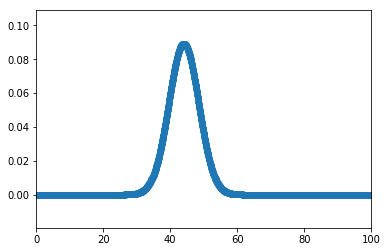

In [13]:
def combine(p1, p2):
    ans = []
    for i in range(len(p1)):
        ans.append(p1[i]*p2[i])
    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

def divide(p, omega):
    ans1 = []
    ans2 = []
    for i in range(len(p)):
        ans1.append(math.pow(p[i], omega))
        ans2.append(math.pow(p[i], 1-omega))
    total1 = sum(ans1)*dlt
    total2 = sum(ans2)*dlt
    for i in range(len(ans1)):
        ans1[i] /= total1
        ans2[i] /= total2
    return [ans1, ans2]

p = combine(dist1, dist2)
print(sum(p)*dlt)
plt.scatter(x_axis, p)
plt.xlim(x_min, x_max)
plt.show()
# p1, p2 = divide(p, 0.4)
# print(sum(p1)*dlt)
# print(sum(p2)*dlt)
# plt.scatter(x_axis, p1)
# plt.xlim(x_min, x_max)
# plt.show()
# plt.scatter(x_axis, p2)
# plt.xlim(x_min, x_max)
# plt.show()

# repeated interactions

In [10]:
n_interactions = 100

## Naive

1.0
1.0


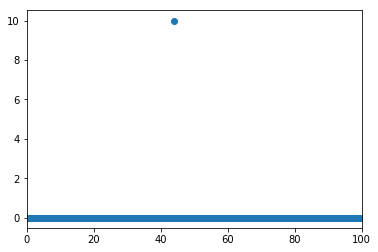

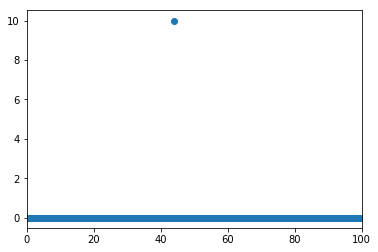

In [11]:
p1 = list(dist1)
p2 = list(dist2)
for i in range(n_interactions):
    p1 = combine(p1, p2)
    p2 = list(p1)

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()

# Conservative

1.000000000000001
0.9999999999999993


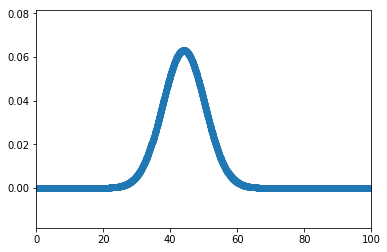

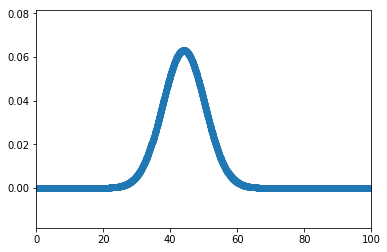

In [12]:
p1 = list(dist1)
p2 = list(dist2)
omega = 0.9
for i in range(n_interactions):
    p1_omega, p1_1_omega = divide(p1, omega)
    p2_omega, p2_1_omega = divide(p2, omega)
    p1 = combine(p1_omega, p2_1_omega)
    p2 = combine(p2_omega, p1_1_omega)

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()